In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb
import math
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression
import warnings
import pdb
warnings.filterwarnings('ignore')
import random
import matplotlib.pyplot as plt

def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)  # 禁止hash随机化


set_seed(42)
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

train = train.dropna()
train.reset_index(drop=True,inplace=True)

label = 'Main_steam_flow_rate'

# =============================================================================
# ['时间', '主蒸汽流量', 'CO含量', 'HCL含量', 'NOx含量', 'SO2含量', '一次风调门', '一次风量',
#        '主蒸汽流量设定值', '二次风调门', '二次风量', '引风机转速', '推料器启停', '推料器手动指令',
#        '推料器自动投退信号', '推料器自动指令', '氧量设定值', '汽包水位', '炉排启停', '炉排实际运行指令',
#        '炉排手动指令', '炉排自动投退信号', '给水流量']
# =============================================================================

train.columns = ['Time', 'Main_steam_flow_rate', 'CO_content', 'HCL_content', 'NOx_content', 'SO2_content', 'Primary_air_regulator', 'Primary_air_volume',
       'Main_steam_flow_rate_setting', 'Secondary_air_regulator', 'Secondary_air_volume', 'Inducer_fan_speed', 'Pusher_start_stop', 'Pusher_manual_command',
       'Pusher_automatic_throwback_signal', 'Pusher_automatic_command', 'Oxygen_setpoint', 'Ladle_water_level', 'Grate_start_stop', 'Grate_actual_operation_command',
       'Grate_manual_command', 'Grate_automatic_throw-out_signal', 'Feedwater_flow']
# ['Feedwater_flow', 'Oxygen_setpoint', 'Primary_air_volume', 'Main_steam_flow_rate_setting', 'Ladle_water_level']
# 给水流量, 氧量设定值, 一次风量, 主蒸汽流量设定值, 汽包水位

## <font color='red'> >>>分析下 Time :
## 每条数据是每一秒的数据

## <font color='red'> >>>分析下 Main_steam_flow_rate （label）:
### 统计当前时间的前n天时间的Main_steam_flow_rate的mean, min, max, std, 同时可以看他们在哪个区间（可尝试给不同区间的值分一个类别）

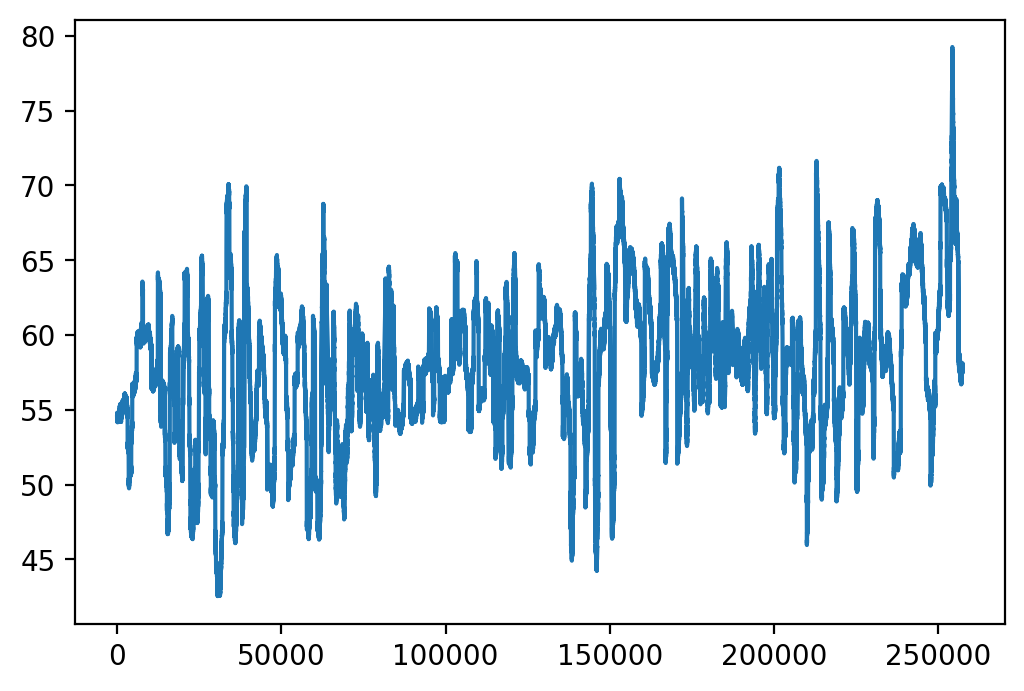

In [2]:
Main_steam_flow_rate = train['Main_steam_flow_rate']
plt.figure(dpi=200)
plt.plot(Main_steam_flow_rate)

In [3]:
pd.Series(Main_steam_flow_rate).describe()

count    257382.000000
mean         58.041519
std           5.141275
min          42.536400
25%          54.769825
50%          58.095900
75%          61.188500
max          79.259500
Name: Main_steam_flow_rate, dtype: float64